<a href="https://colab.research.google.com/github/BerkayArdaa/ML_HandwrittenDigits_Classification_CNN/blob/main/ML_Homework3_CNNOptimizedwithResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# === MNIST CNN Homework - EEE 517 ===
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [2]:
# Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train images shape :", X_train.shape)
print("Train labels shape :", y_train.shape)
print("Test images shape  :", X_test.shape)
print("Test labels shape  :", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train images shape : (60000, 28, 28)
Train labels shape : (60000,)
Test images shape  : (10000, 28, 28)
Test labels shape  : (10000,)


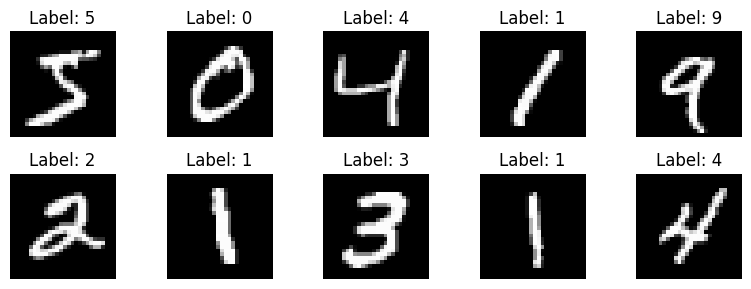

In [3]:
# Showing some sample images from the dataset

plt.figure(figsize=(8, 3))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
# Normalize pixel values to [0,1] and reshape for CNN

# Convert from (N, 28, 28) to (N, 28, 28, 1) and scale to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

print("New train shape:", X_train.shape)
print("New test shape :", X_test.shape)


New train shape: (60000, 28, 28, 1)
New test shape : (10000, 28, 28, 1)


In [5]:
# Create a small validation set from training data

from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

print("Train subset shape:", X_train_sub.shape, y_train_sub.shape)
print("Validation shape  :", X_val.shape, y_val.shape)
print("Test shape        :", X_test.shape, y_test.shape)


Train subset shape: (54000, 28, 28, 1) (54000,)
Validation shape  : (6000, 28, 28, 1) (6000,)
Test shape        : (10000, 28, 28, 1) (10000,)


In [149]:
# === CNN Model Definition ===

tf.keras.backend.clear_session()

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_opt = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),          # optimum dropout
    Dense(10, activation='softmax')
])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [150]:
from tensorflow.keras.optimizers import Adam

# Optimizer with optimal learning rate (default 0.001)
opt = Adam(learning_rate=0.001)

model_opt.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [151]:
# Final training
history_opt = model_opt.fit(
    X_train_sub, y_train_sub,
    epochs=10,
    batch_size=32,         # optimum batch size
    validation_data=(X_val, y_val),
    verbose=1
)

# Final accuracy
print("Final Validation Accuracy:", max(history_opt.history['val_accuracy']))

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8797 - loss: 0.3778 - val_accuracy: 0.9825 - val_loss: 0.0583
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9803 - loss: 0.0644 - val_accuracy: 0.9883 - val_loss: 0.0413
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9866 - loss: 0.0442 - val_accuracy: 0.9900 - val_loss: 0.0365
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.9893 - val_loss: 0.0341
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9925 - loss: 0.0248 - val_accuracy: 0.9910 - val_loss: 0.0334
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9934 - loss: 0.0237 - val_accuracy: 0.9923 - val_loss: 0.0314
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9920 - val_loss: 0.0383
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9953 - loss: 0.0156 -

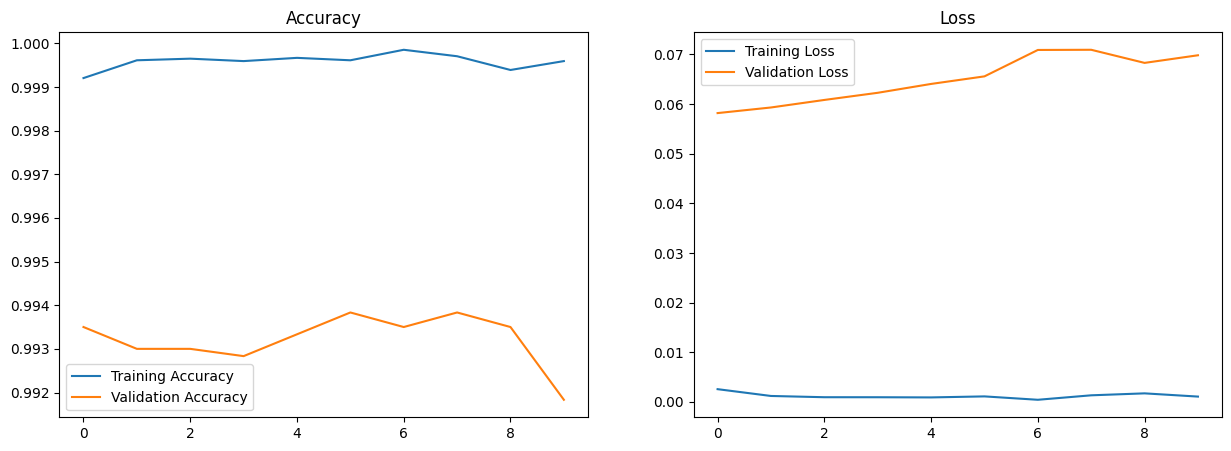

In [167]:
plt.figure(figsize=(15,5))

# ACCURACY
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

# LOSS
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.show()


In [168]:
import os
print(os.listdir("VDataset"))


['indir.png', 'deneme3.jpg', 'deneme4.jpg', 'numbers.jpg', '.ipynb_checkpoints', 'deneme2.png']


In [169]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("VDataset/deneme3.jpg")

if img is None:
    print("FAILED to load image!")
else:
    print("Image loaded successfully!")


Image loaded successfully!


Image successfully loaded!


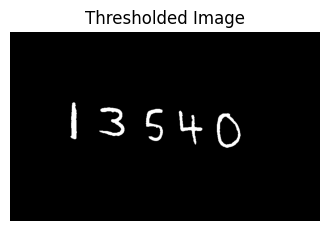

Detected contours: 5
Detected digits after filtering: 4
Predicted digits in order:
3
5
4
2


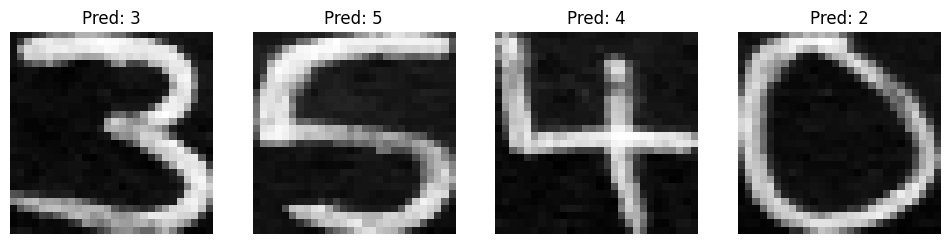

In [171]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# --- Load image ---
img = cv2.imread("VDataset/deneme4.jpg")

if img is None:
    print("Image NOT loaded!")
else:
    print("Image successfully loaded!")

# 1) Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2) Gaussian blur (noise reduction)
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)

# 3) Binary inverse threshold (white digit on black bg)
_, thresh = cv2.threshold(
    gray_blur, 0, 255,
    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)

# Show thresholded image
plt.figure(figsize=(4,4))
plt.imshow(thresh, cmap="gray")
plt.title("Thresholded Image")
plt.axis("off")
plt.show()

# 4) Find contours (digits)
contours, _ = cv2.findContours(
    thresh.copy(),
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

print("Detected contours:", len(contours))

digits = []

# 5) Process each contour
for c in contours:
    x, y, w, h = cv2.boundingRect(c)

    # --- FILTER NOISE (skip tiny contours) ---
    if w < 40 or h < 40:
        continue

    # Crop digit region
    digit = gray[y:y+h, x:x+w]

    # Resize to 28x28
    digit = cv2.resize(digit, (28,28), interpolation=cv2.INTER_AREA)

    # MNIST = white digit (foreground)
    digit = 255 - digit

    # Normalize
    digit_ready = digit.astype("float32") / 255.0

    # Reshape for CNN
    digit_ready = digit_ready.reshape(1, 28, 28, 1)

    # Predict
    pred = np.argmax(model.predict(digit_ready, verbose=0))

    digits.append((x, pred, digit))

# 6) Sort digits left → right
digits.sort(key=lambda t: t[0])

# Print number of VALID digits
print("Detected digits after filtering:", len(digits))

# 7) Print predictions in correct order
print("Predicted digits in order:")
for d in digits:
    print(d[1])

# 8) Show each processed digit with its prediction
plt.figure(figsize=(12,3))
for i, (_, pred, roi) in enumerate(digits):
    plt.subplot(1, len(digits), i+1)
    plt.imshow(roi, cmap='gray')
    plt.title(f"Pred: {pred}")
    plt.axis("off")
plt.show()
